In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from dynascale.utils.lds import plot
from dynascale.challenges.lds import LDSChallenge

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

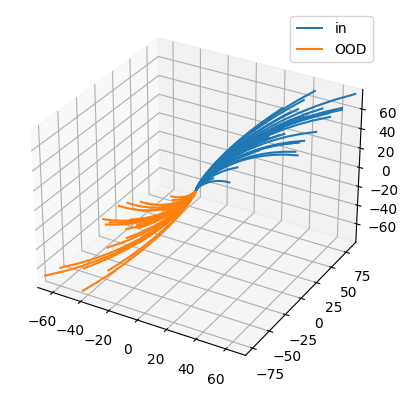

In [11]:
challenge = LDSChallenge(2, 3)
x1 = challenge.make_data(50, n=100)
x2 = challenge.make_data(50, n=100, in_dist=False)
plot([x1, x2], labels=["in", "OOD"])